# 📊 Sales Prediction using Advertising Data
Predict future sales based on advertising spend across TV, Radio, and Newspaper channels.
- Understand how each channel affects sales
- Build a regression model for prediction
- Provide marketing insights

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style='whitegrid')

## 📥 Load the Dataset

In [2]:
df = pd.read_csv('C:\\Users\\hp\\Downloads\\Sales Prediction Using Python\\Advertising.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## 🧹 Data Cleaning & Summary

In [3]:
print(df.isnull().sum())
df.describe()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## 📊 Feature Distributions

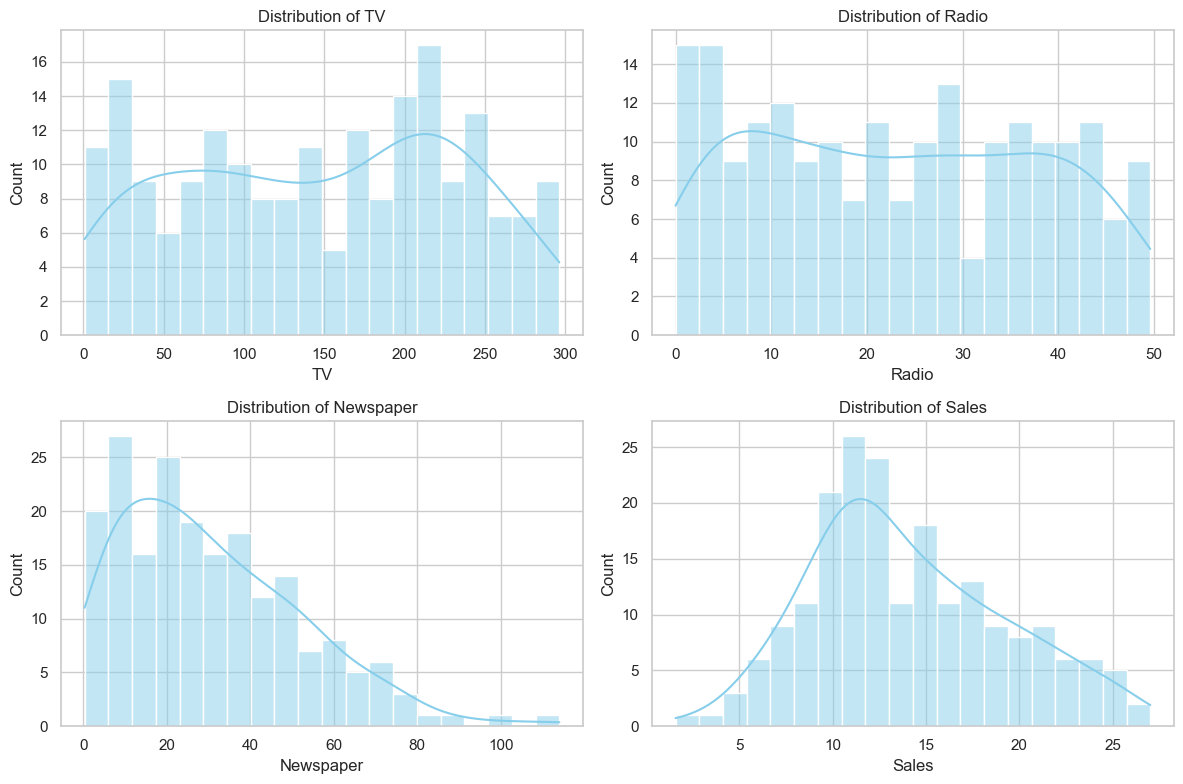

In [4]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[column], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

## 🔍 Correlation Heatmap

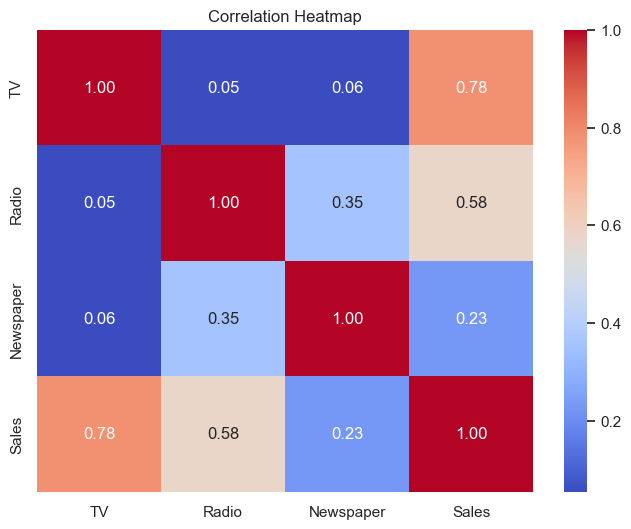

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## 📈 Linear Regression Model

In [6]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.2f}')

MSE: 3.17
RMSE: 1.78
R² Score: 0.90


## 📌 Feature Importance

In [7]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients

,Feature,Coefficient
0,TV,0.044730
1,Radio,0.189195
2,Newspaper,0.002761


## 🎯 Actual vs Predicted Sales

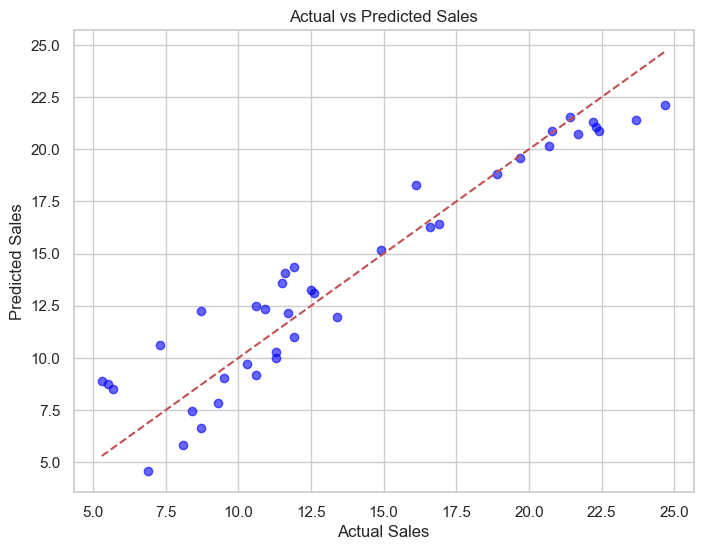

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

## ✅ Conclusion
- **TV and Radio** advertising significantly impact sales.
- **Newspaper** has minimal effect and may be less cost-effective.
- The linear regression model performs well with R² ≈ 0.90.
- Businesses should consider reallocating budget from Newspaper to TV/Radio for better ROI.